## Apple  Stock Prediction ARIMA  and MA with Daily AAPL data

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

C:\Users\namit\AppData\Local\Temp/ipykernel_11580/3440337988.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/FTSA/data/AAPL.csv')
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2072,2022-03-25,173.880005,175.279999,172.750000,174.720001,174.720001,80546200
2073,2022-03-28,172.169998,175.729996,172.000000,175.600006,175.600006,90371900
2074,2022-03-29,176.690002,179.009995,176.339996,178.960007,178.960007,100589400
2075,2022-03-30,178.550003,179.610001,176.699997,177.770004,177.770004,92633200
2076,2022-03-31,177.839996,178.029999,174.399994,174.610001,174.610001,103049300


In [ ]:

import statsmodels.api as sm
# divide the data into a training (70 % ) and test (30%) set.
train_data, testing_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = testing_data['Close'].values
history = [x for x in training_data]
prediction_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = sm.tsa.arima.ARIMA(history, order=(4,1,0))
    
    modfit = model.fit()
    output = modfit.forecast()
    out = output[0]
    prediction.append(out)
    true_test_value = test_data[time_point]
    history.append(true_test_value)


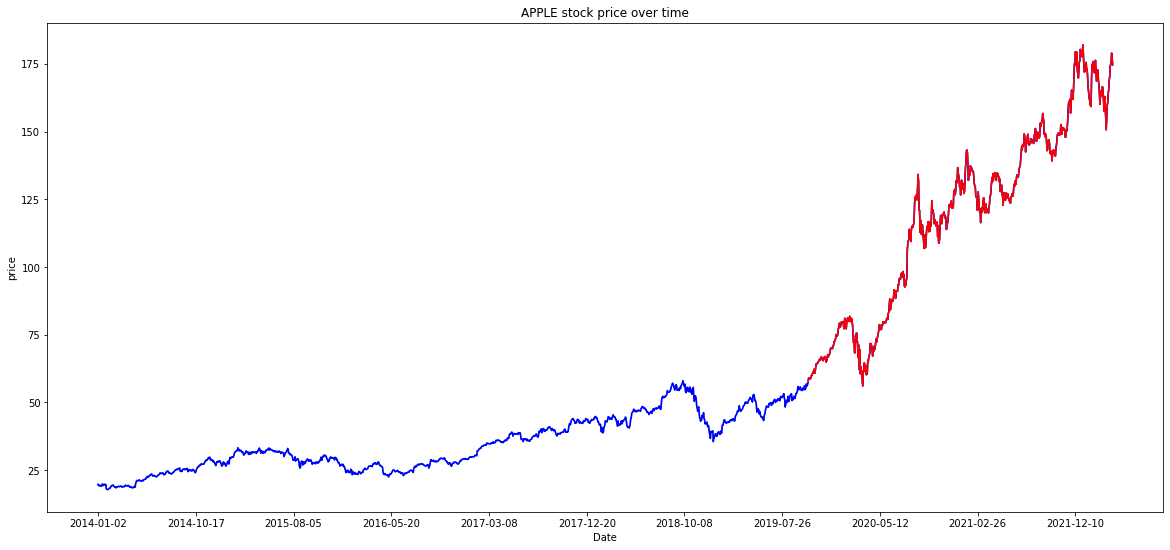

In [ ]:
plt.figure(figsize=(20, 9))
plt.plot(df["Date"], df["Close"])
plt.plot(df["Close"], 'blue', label='Training Data')
plt.plot(testing_data['Close'], 'red', label='Testing Data')
plt.xticks(np.arange(0,2076, 200), df['Date'][0:2076:200])
plt.title("APPLE stock price over time")
plt.xlabel("Date")
plt.ylabel("price")
plt.show()
# plt.legend()

In [ ]:
mae = np.mean(np.abs(prediction - test_data)) 
mpe = np.mean((prediction - test_data)/test_data)*100
rmse = np.sqrt(np.mean(((prediction - test_data)**2)))
mape = np.mean(np.abs(prediction - test_data)/np.abs(test_data))*100
print("MAE: {:.2f}".format(mae))
print("MPE: {:.2f} ".format(mpe))
print("RMSE: {:.2f}".format(rmse))
print("MAPE: {:.2f} ".format(mape))

MAE: 1.76
MPE: -0.17 
RMSE: 2.43
MAPE: 1.55 


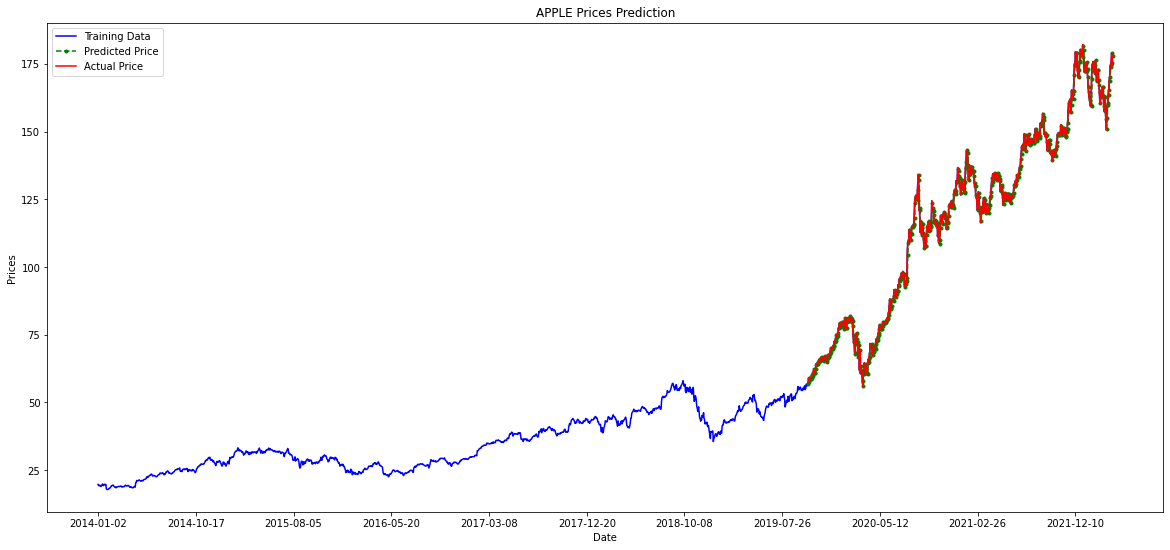

In [ ]:
rang = df[int(len(df)*0.7):].index
plt.figure(figsize=(20,9))
plt.plot(df['Close'], color='blue', label='Training Data')
plt.plot(rang, prediction, color='green', marker='.', linestyle='dashed',label='Predicted Price')
plt.plot(rang, test_data, color='red', label='Actual Price')
plt.title('APPLE Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(0,2078,200), df.Date[0:2078:200])
plt.legend()
plt.show()

### Simple Moving Average 
SMA with a window size of 10 , 20

[]

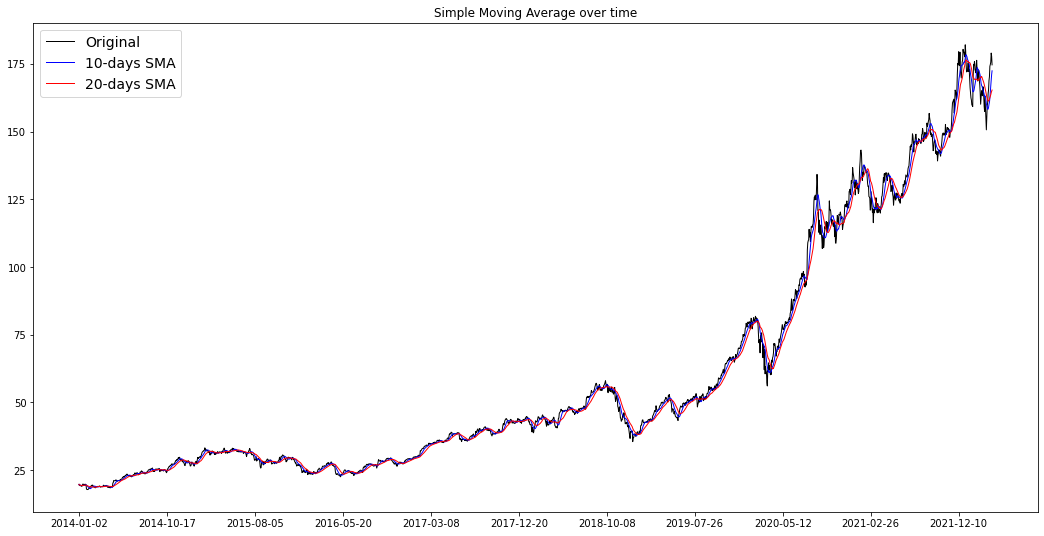

In [ ]:

plt.plot(df["Date"], df["Close"],linewidth=1,color='black')

plt.xticks(np.arange(0,2076, 200), df['Date'][0:2076:200])
plt.title("Simple Moving Average over time")
df['SMA_10']= df['Close'].rolling(window=10,min_periods=1).mean()
df['SMA_20'] = df['Close'].rolling(window=20,min_periods=1).mean()
df['SMA_10'].plot(color='blue', linewidth=1, figsize=(18,9))
df['SMA_20'].plot(color='red', linewidth=1, figsize=(18,9))
plt.legend(labels =['Original', '10-days SMA', '20-days SMA','Predicted ARIMA'], fontsize=14)
plt.plot()

Evaluation on simple moving average with window = 20

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(df['Close'], df['SMA_20'])).round(2)
mape = np.round(np.mean(np.abs(df['Close']-df['SMA_20'])/df['Close'])*100,2)
mae = np.mean(np.abs(df['Close'] - df['SMA_20'])) 
mpe = np.mean((df['Close'] - df['SMA_20'])/df['Close'])*100
print("MAE: {:.2f}".format(mae))
print("MPE: {:.2f} ".format(mpe))
print("RMSE: {:.2f}".format(rmse))
print("MAPE: {:.2f} ".format(mape))



MAE: 2.12
MPE: 0.85 
RMSE: 3.33
MAPE: 3.35 


 ### Exponentially Moving Average 
 Exponentially weighted moving averages with a span value of 3, 6, and 12, and shows them visually:

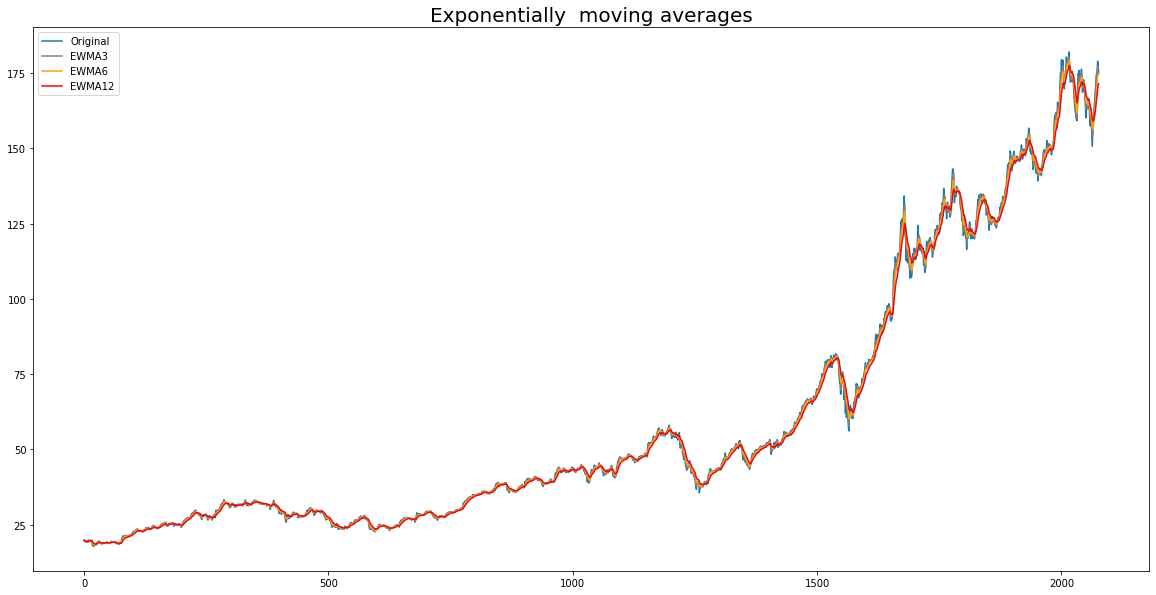

In [ ]:
df['EWMA3'] = df['Close'].ewm(span=3, adjust=False).mean()
df['EWMA6'] = df['Close'].ewm(span=6, adjust=False).mean()
df['EWMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
plt.figure(figsize=(20, 10))
# Plot
plt.title('Exponentially  moving averages', size=20)
plt.plot(df['Close'], label='Original')
plt.plot(df['EWMA3'], color='gray', label='EWMA3')
plt.plot(df['EWMA6'], color='orange', label='EWMA6')
plt.plot(df['EWMA12'], color='red', label='EWMA12')
plt.legend();

Evaluation on Exponential moving average with span = 12

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(df['Close'], df['EWMA12'])).round(2)
mape = np.round(np.mean(np.abs(df['Close']-df['EWMA12'])/df['Close'])*100,2)
mae = np.mean(np.abs(df['Close'] - df['EWMA12'])) 
mpe = np.mean((df['Close'] - df['EWMA12'])/df['Close'])*100
print("MAE: {:.2f}".format(mae))
print("MPE: {:.2f} ".format(mpe))
print("RMSE: {:.2f}".format(rmse))
print("MAPE: {:.2f} ".format(mape))


MAE: 1.33
MPE: 0.49 
RMSE: 2.14
MAPE: 2.10 
